In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,image,label
0,,72 (water lily)
1,,84 (desert-rose)
2,,70 (gazania)
3,,51 (wild pansy)

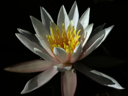
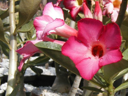
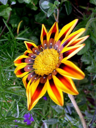
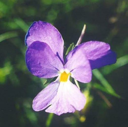

In [4]:
#Load the training and testing dataset
(ds_train, ds_test), ds_info = tfds.load('oxford_flowers102', split=['train', 'test'], with_info=True, as_supervised=True)
#Visualise some of the items in the dataset
tfds.as_dataframe(ds_train.take(4), ds_info)

In [5]:
#This gets the images ready 

def normalize_img(image, label):
    return tf.cast(image, tf.float32)/255.0, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(1000)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(AUTOTUNE)

In [6]:
#Making the NN model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)



In [7]:
#Dataset info
ds_info


tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

In [8]:

#Train the model 
#THIS ISNT WORKING FOR SOME REASON
history = model.fit(ds_train, epochs=10)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'IteratorGetNext' defined at (most recent call last):
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\asyncio\base_events.py", line 541, in run_forever
      self._run_once()
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\asyncio\base_events.py", line 1786, in _run_once
      handle._run()
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py", line 387, in do_execute
      cell_id=cell_id,
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 2976, in run_cell
      raw_cell, store_history, silent, shell_futures, cell_id
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3258, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\tomfe\AppData\Local\Temp\ipykernel_21240\110740408.py", line 1, in <module>
      history = model.fit(ds_train, epochs=10)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 1232, in step_function
      data = next(iterator)
Node: 'IteratorGetNext'
Cannot batch tensors with different shapes in component 0. First element had shape [531,500,3] and element 48 had shape [500,752,3].
	 [[{{node IteratorGetNext}}]] [Op:__inference_train_function_943]